Welcome to: Delhi Temperature Prediction using Python by Your Name
Enter a reference year (e.g., 2025): 2025
Reference year selected: 2025
Result of a + b * c ** 2 = 22
Is expr_result > 20 and not zero? True
Original float temp: 35.6 | After int(): 35 | As string: 35.6
Cities list: ['Delhi', 'Gurgaon', 'Noida']
Delhi coordinates (tuple): (28.6139, 77.209)
City codes (dict): {'Delhi': 110001, 'Gurgaon': 122001, 'Noida': 201301}
Unique years (set): {2024, 2025, 2023}
Squared first 5 days: [1, 4, 9, 16, 25]
Example NumPy array: [30.5 31.2 29.8 32. ]
Array mean temperature: 30.875
Mounted at /content/drive
Historical data loaded successfully.
October data loaded successfully.


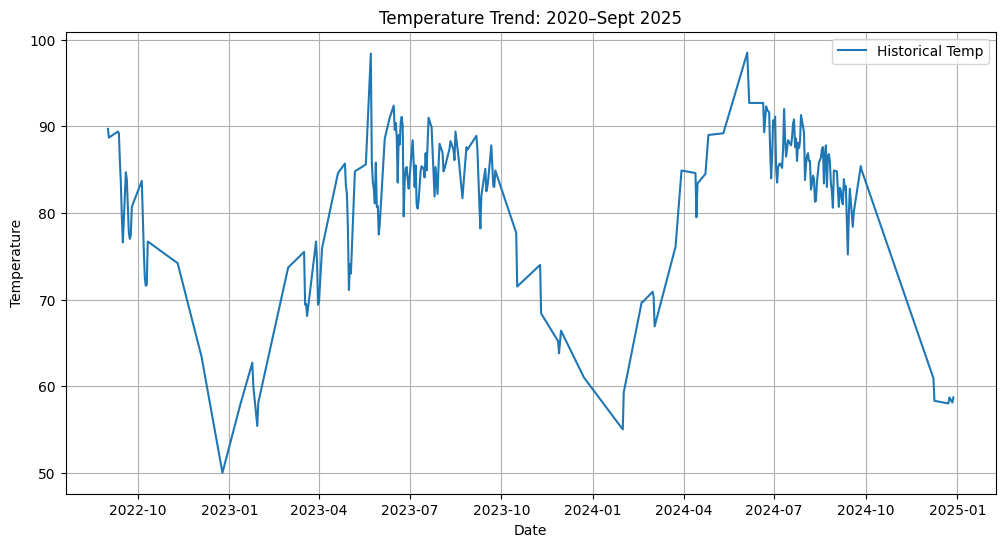

,Date,Actual,Linear_Pred,Linear_Error,RF_Pred,RF_Error
0,2025-01-01,50.8,84.68,33.88,82.42,31.62
1,2025-01-02,50.9,53.94,3.04,57.35,6.45
2,2025-01-03,53.7,54.02,0.32,57.54,3.84
3,2025-01-04,54.9,56.54,1.64,57.54,2.64
4,2025-01-05,53.7,57.62,3.92,58.44,4.74
5,2025-01-06,54.7,56.53,1.83,57.56,2.86
6,2025-01-07,54.2,57.43,3.23,58.17,3.97
7,2025-01-08,55.0,56.97,1.97,57.97,2.97
8,2025-01-09,55.6,57.69,2.09,58.27,2.67
9,2025-01-10,53.3,58.22,4.92,58.46,5.16


,Model,MAE,RMSE,MAPE (%),Accuracy (%)
0,Linear Regression,2.252953,3.456537,2.999742,97.000258
1,Random Forest,2.846403,3.815971,3.683158,96.316842


,n_estimators,max_depth,train_R2
0,100,NaN,0.982954
1,200,NaN,0.983362
2,150,10.0,0.980652


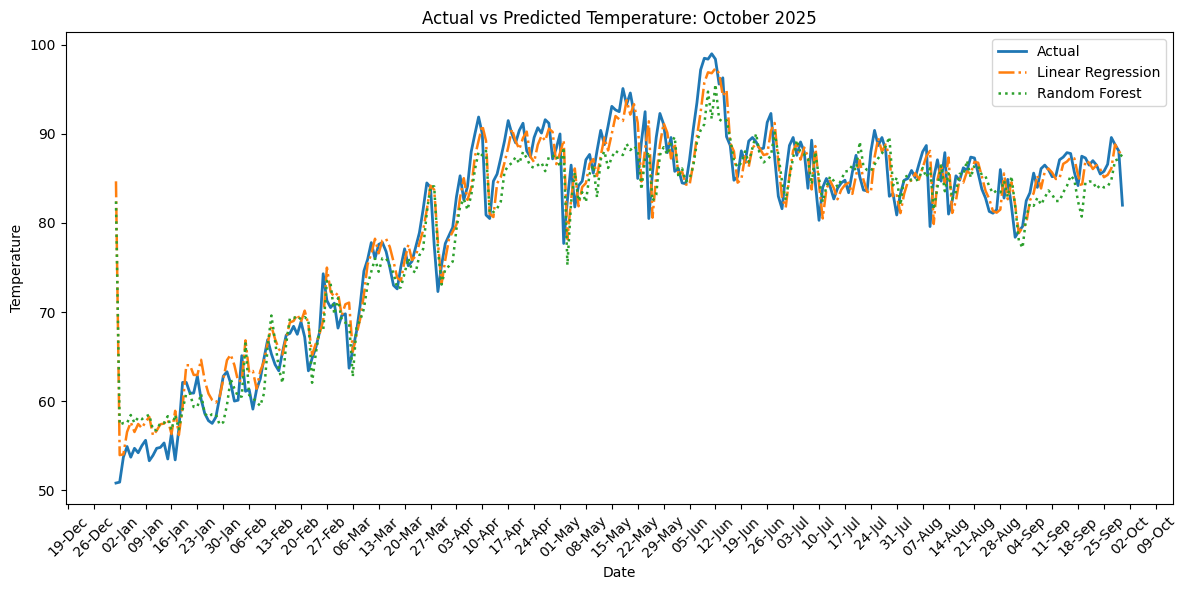

In [1]:
# -----------------------------
# Module 1 & 2: Intro + Basics
# -----------------------------

# Simple welcome message (print) and basic variables
course_name = "Delhi Temperature Prediction using Python"
author_name = "Your Name"
print(f"Welcome to: {course_name} by {author_name}")

# Basic input/output and type conversion (string -> int)
# (You can comment these two lines when running in a notebook if needed)
user_year_str = input("Enter a reference year (e.g., 2025): ")
try:
    user_year = int(user_year_str)  # explicit type conversion
except ValueError:
    # Control flow with exception handling
    print("Invalid year, using default 2025.")
    user_year = 2025

print("Reference year selected:", user_year)

# -----------------------------
# Module 3, 5 & 6: Operators, Precedence, Type Conversion
# -----------------------------

# Arithmetic, comparison, logical operators and precedence
# Example expression to demonstrate precedence and associativity
a = 10
b = 3
c = 2
expr_result = a + b * c ** 2  # ** has highest, then *, then +
print("Result of a + b * c ** 2 =", expr_result)

# Boolean / comparison operators
is_large = expr_result > 20 and expr_result != 0
print("Is expr_result > 20 and not zero?", is_large)

# Type conversion examples
float_temp = 35.6
int_temp = int(float_temp)   # explicit conversion (float -> int)
str_temp = str(float_temp)   # explicit conversion (float -> str)
print("Original float temp:", float_temp,
      "| After int():", int_temp,
      "| As string:", str_temp)

# -----------------------------
# Module 7: Core Data Structures
# -----------------------------

# Lists to store basic metadata
cities = ["Delhi", "Gurgaon", "Noida"]
print("Cities list:", cities)

# Tuple for a fixed coordinate (immutable data)
delhi_coord = (28.6139, 77.2090)
print("Delhi coordinates (tuple):", delhi_coord)

# Dictionary to map city -> code
city_codes = {"Delhi": 110001, "Gurgaon": 122001, "Noida": 201301}
print("City codes (dict):", city_codes)

# Set to store unique years (duplicates removed)
years_set = {2023, 2024, 2025, 2025}
print("Unique years (set):", years_set)

# Simple list comprehension (still core data structure usage)
squared_days = [day ** 2 for day in range(1, 6)]
print("Squared first 5 days:", squared_days)

# --------------------------------------
# Imports (Modules & Packages in Python)
# Module 10 + 11 (Array via NumPy)
# --------------------------------------

import pandas as pd
import numpy as np  # NumPy (array data structure)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display

# NumPy array demo (array data structure)
temp_array_example = np.array([30.5, 31.2, 29.8, 32.0])
print("Example NumPy array:", temp_array_example)
print("Array mean temperature:", temp_array_example.mean())

# Google Drive mounting (I/O with external files)
from google.colab import drive
drive.mount('/content/drive')

# --------------------------------------
# Module 9: Functions + Control Flow
# (Also shows input/output operations)
# --------------------------------------

# Function to safely load CSV with error handling
def load_data(hist_path, oct_path):
    """
    Load historical and October datasets from CSV files.
    Demonstrates:
    - File I/O with pandas
    - try/except control flow
    """
    try:
        hist_data = pd.read_csv(hist_path)
        print("Historical data loaded successfully.")
    except FileNotFoundError:
        raise FileNotFoundError(f"Historical file not found at: {hist_path}")
    except Exception as error:
        raise RuntimeError(f"Error loading historical data: {error}")

    try:
        oct_data = pd.read_csv(oct_path)
        print("October data loaded successfully.")
    except FileNotFoundError:
        raise FileNotFoundError(f"October file not found at: {oct_path}")
    except Exception as error:
        raise RuntimeError(f"Error loading October data: {error}")

    return hist_data, oct_data


# Function to create features using control flow and type conversion
def crt_feat(hist_data, oct_data):
    """
    Create features from raw data.
    Demonstrates:
    - Date parsing and sorting
    - Creating new columns
    - Control flow with for loops
    """
    # Parse date columns and sort (implicit type conversion by pandas)
    hist_data["datetime"] = pd.to_datetime(hist_data["datetime"], dayfirst=True)
    oct_data["datetime"] = pd.to_datetime(oct_data["datetime"], dayfirst=True)
    hist_data = hist_data.sort_values("datetime")
    oct_data = oct_data.sort_values("datetime")

    # Historical features
    hist_data["year"] = hist_data["datetime"].dt.year
    hist_data["month"] = hist_data["datetime"].dt.month
    hist_data["day"] = hist_data["datetime"].dt.day
    hist_data["temp_prev_day"] = hist_data["temp"].shift(1)

    # Control flow: drop rows with missing values
    hist_data = hist_data.dropna()

    # October features
    oct_data["year"] = oct_data["datetime"].dt.year
    oct_data["month"] = oct_data["datetime"].dt.month
    oct_data["day"] = oct_data["datetime"].dt.day

    # Attach previous day's temperature for October
    oct_with_prev = oct_data.copy()
    # Use boolean indexing and iloc (core data structure operations)
    last_sept_temp = hist_data[hist_data["datetime"].dt.month == 9].iloc[-1]["temp"]
    oct_with_prev["temp_prev_day"] = last_sept_temp

    # for loop to update previous-day temperature
    for i in range(1, len(oct_with_prev)):
        oct_with_prev.iloc[i, oct_with_prev.columns.get_loc("temp_prev_day")] = \
            oct_with_prev.iloc[i - 1]["temp"]

    feature_cols = ["year", "month", "day", "temp_prev_day"]
    return hist_data, oct_with_prev, feature_cols


# Function to plot historical data
def plot_hist_trend(hist_data):
    """
    Plot temperature trend.
    Demonstrates:
    - Matplotlib plotting
    - Functions as reusable modules
    """
    plt.figure(figsize=(12, 6))
    plt.plot(hist_data["datetime"], hist_data["temp"], label="Historical Temp")
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.title("Temperature Trend: 2020–Sept 2025")
    plt.legend()
    plt.grid(True)
    plt.show()


# --------------------------------------
# Module 12: OOP + Model Handling
# --------------------------------------

class TemperatureModelPipeline:
    """
    OOP wrapper to handle model training and evaluation.
    Demonstrates:
    - Classes, __init__, methods
    - Encapsulation of RandomForest and LinearRegression
    """

    def __init__(self):
        # Attributes to store trained models
        self.linear_model = LinearRegression()
        self.rf_model = None
        self.rf_score_table = None

    def train_random_forest(self, X_train, y_train):
        """
        Train RandomForest with simple hyperparameter search.
        """
        candidate_settings = [
            {"n_estimators": 100, "max_depth": None},
            {"n_estimators": 200, "max_depth": None},
            {"n_estimators": 150, "max_depth": 10},
        ]

        best_model = None
        best_score = -np.inf
        score_rows = []

        # for loop to test different hyperparameters
        for params in candidate_settings:
            rf_model = RandomForestRegressor(
                n_estimators=params["n_estimators"],
                max_depth=params["max_depth"],
                random_state=42,
            )
            rf_model.fit(X_train, y_train)
            train_r2 = rf_model.score(X_train, y_train)

            score_rows.append(
                {
                    "n_estimators": params["n_estimators"],
                    "max_depth": params["max_depth"],
                    "train_R2": train_r2,
                }
            )

            # if/else for best model selection
            if train_r2 > best_score:
                best_score = train_r2
                best_model = rf_model

        self.rf_model = best_model
        self.rf_score_table = pd.DataFrame(score_rows)

    def metrics(self, y_true, y_pred):
        """
        Calculate MAE, RMSE, MAPE, and accuracy.
        """
        mae = np.mean(np.abs(y_pred - y_true))
        rmse = np.sqrt(np.mean((y_pred - y_true) ** 2))
        mape = np.mean(np.abs((y_pred - y_true) / y_true)) * 100
        accuracy = 100 - mape
        return mae, rmse, mape, accuracy

    def eval_models(self, X_train, y_train, X_test, y_test, october_dates):
        """
        Train and evaluate Linear Regression and Random Forest models.
        Returns daily results, metric table, and RF score table.
        """
        # Train baseline linear model
        self.linear_model.fit(X_train, y_train)
        linear_pred = self.linear_model.predict(X_test)

        # Train RandomForest using OOP method
        self.train_random_forest(X_train, y_train)
        rf_pred = self.rf_model.predict(X_test)

        # Compute metrics
        lr_mae, lr_rmse, lr_mape, lr_accuracy = self.metrics(y_test, linear_pred)
        rf_mae, rf_rmse, rf_mape, rf_accuracy = self.metrics(y_test, rf_pred)

        # Day-wise comparison table
        daily_results = pd.DataFrame(
            {
                "Date": october_dates,
                "Actual": y_test.round(2),
                "Linear_Pred": linear_pred.round(2),
                "Linear_Error": (linear_pred - y_test).round(2),
                "RF_Pred": rf_pred.round(2),
                "RF_Error": (rf_pred - y_test).round(2),
            }
        )

        # Summary metric table
        metric_table = pd.DataFrame(
            {
                "Model": ["Linear Regression", "Random Forest"],
                "MAE": [lr_mae, rf_mae],
                "RMSE": [lr_rmse, rf_rmse],
                "MAPE (%)": [lr_mape, rf_mape],
                "Accuracy (%)": [lr_accuracy, rf_accuracy],
            }
        )

        return daily_results, metric_table, self.rf_score_table


# Function to plot comparison for October temperatures
def plot_oct_comparison(daily_results):
    """
    Plot actual vs predicted temperatures for October.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(daily_results["Date"], daily_results["Actual"], label="Actual", linewidth=2)
    plt.plot(
        daily_results["Date"],
        daily_results["Linear_Pred"],
        label="Linear Regression",
        linestyle="-.",
        linewidth=1.8,
    )
    plt.plot(
        daily_results["Date"],
        daily_results["RF_Pred"],
        label="Random Forest",
        linestyle=":",
        linewidth=1.8,
    )
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.title("Actual vs Predicted Temperature: October 2025")
    plt.legend()

    # Improve x-axis readability
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# --------------------------------------
# Main workflow (Control Flow + Future)
# --------------------------------------

hist_path = "/content/drive/MyDrive/vityarthiproj/dataset1.csv"
oct_path = "/content/drive/MyDrive/vityarthiproj/dataset2.csv"

# Look into the future: this main block can be extended later
# to support more months, new models (like XGBoost), or REST APIs.

# Load data
hist_data_raw, oct_data_raw = load_data(hist_path, oct_path)

# Create features
hist_data, oct_with_prev, feature_cols = crt_feat(hist_data_raw, oct_data_raw)

# Optional historical plot
plot_hist_trend(hist_data)

# Train-test split: up to Sept 2025 for training, October 2025 for testing
train_mask = hist_data["datetime"] < "2025-10-01"
train_data = hist_data[train_mask]
X_train = train_data[feature_cols]
y_train = train_data["temp"]
X_test = oct_with_prev[feature_cols]
y_test = oct_with_prev["temp"]

# Create OOP pipeline instance
pipeline = TemperatureModelPipeline()

# Evaluate models
daily_results, metric_table, rf_score_table = pipeline.eval_models(
    X_train, y_train, X_test, y_test, oct_with_prev["datetime"]
)

# Show a focused comparison table (first 10 days)
daily_results_first10 = daily_results[
    ["Date", "Actual", "Linear_Pred", "Linear_Error", "RF_Pred", "RF_Error"]
].head(10)

display(daily_results_first10)   # day-wise comparison (top 10 days)
display(metric_table)            # overall metrics for both models
display(rf_score_table)          # training scores for Random Forest settings

# Visual comparison plot
plot_oct_comparison(daily_results)
